# Historical Coal Production Data: 2021

# Source: The U.S. Energy Information Administration (EIA) and the U.S. Mine Safety and Health Administration

## Importing Necessary Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Data Import

In [57]:
data_coal = pd.read_csv('COAL_PRODUCTION_2021_filtered.csv')
data_coal = data_coal.drop(['Mine Name', 'Mine State'], axis=1)
data_coal.head(10)

Year    Mine Type Production (short tons)  Average Employees Labor Hours
0  2021      Surface                   6,487                  2         820
1  2021      Surface                2,03,190                 42    1,17,312
2  2021  Underground               20,20,277                461   11,00,028
3  2021  Underground               47,93,699                514   15,02,426
4  2021      Surface                     130                  3       2,757
5  2021  Underground                  96,907                 27      53,479
6  2021      Surface                1,56,423                 50    1,23,270
7  2021      Surface                  11,795                  7      13,228
8  2021      Surface                2,61,572                 46      85,097
9  2021      Surface                1,69,982                 44    1,14,893

In [58]:
data_coal['Labor Hours'] = data_coal['Labor Hours'].str.replace(',', '')
data_coal['Production (short tons)'] = data_coal['Production (short tons)'].str.replace(',', '')
data_coal = data_coal.astype({'Labor Hours': 'int64'})
data_coal = data_coal.astype({'Production (short tons)': 'int64'})
data_coal.dtypes

Year                        int64
Mine Type                  object
Production (short tons)     int64
Average Employees           int64
Labor Hours                 int64
dtype: object

In [59]:
data_coal.describe()

Year  Production (short tons)  Average Employees   Labor Hours
count   312.0             3.120000e+02         312.000000  3.120000e+02
mean   2021.0             7.024051e+05          55.855769  1.219417e+05
std       0.0             1.886656e+06         109.136018  2.466141e+05
min    2021.0             1.700000e+01           1.000000  2.000000e+00
25%    2021.0             1.125550e+04           5.000000  5.861000e+03
50%    2021.0             7.105550e+04          14.000000  2.932450e+04
75%    2021.0             2.599268e+05          42.000000  9.724150e+04
max    2021.0             1.309574e+07         716.000000  1.721009e+06

In [60]:
data_coal.columns

Index(['Year', 'Mine Type', 'Production (short tons)', 'Average Employees',
       'Labor Hours'],
      dtype='object')

In [61]:
data_coal.shape

(312, 5)

## Normalising Data

In [62]:
upper_lim1 =  data_coal['Production (short tons)'].mean() +  data_coal['Production (short tons)'].std() * 3
lower_lim1 =  data_coal['Production (short tons)'].mean() -  data_coal['Production (short tons)'].std() * 3
upper_lim2 =  data_coal['Labor Hours'].mean() + data_coal['Labor Hours'].std() * 3
lower_lim2 =  data_coal['Labor Hours'].mean() - data_coal['Labor Hours'].std() * 3
upper_lim3 =  data_coal['Average Employees'].mean() + data_coal['Average Employees'].std() * 3
lower_lim3 =  data_coal['Average Employees'].mean() - data_coal['Average Employees'].std() * 3

In [63]:

data_coal =   data_coal[((data_coal['Production (short tons)']< upper_lim1) & (data_coal['Production (short tons)'] > lower_lim1) & 
                        (data_coal['Labor Hours']< upper_lim2) & (data_coal['Labor Hours'] > lower_lim2) &
                        (data_coal['Average Employees']< upper_lim3) & (data_coal['Average Employees'] > lower_lim3))]
data_coal = data_coal.reset_index(drop=True)
data_coal.describe()

Year  Production (short tons)  Average Employees    Labor Hours
count   296.0             2.960000e+02         296.000000     296.000000
mean   2021.0             3.353010e+05          35.750000   76970.391892
std       0.0             8.069649e+05          59.587039  130936.592516
min    2021.0             1.700000e+01           1.000000       2.000000
25%    2021.0             1.021600e+04           4.000000    5383.500000
50%    2021.0             5.796700e+04          13.000000   26176.500000
75%    2021.0             1.875288e+05          34.000000   75859.000000
max    2021.0             5.299867e+06         368.000000  731822.000000

In [64]:
data_coal.dtypes

Year                        int64
Mine Type                  object
Production (short tons)     int64
Average Employees           int64
Labor Hours                 int64
dtype: object

## Feature Engineering

In [65]:
data_coal["F"] = data_coal["Labor Hours"] * data_coal["Average Employees"]

In [66]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# data = data_coal.copy(deep = True)
# min_max_scaler = MinMaxScaler()
scaler = StandardScaler()
# data.iloc[:, [4, 5, 6]] = min_max_scaler.fit_transform(data.iloc[:, [4, 5, 6]])
# data.head()
x = data_coal.iloc[:, 2:]
x = scaler.fit_transform(x)

In [67]:
data_coal

Year    Mine Type  Production (short tons)  Average Employees  \
0    2021      Surface                     6487                  2   
1    2021      Surface                   203190                 42   
2    2021      Surface                      130                  3   
3    2021  Underground                    96907                 27   
4    2021      Surface                   156423                 50   
..    ...          ...                      ...                ...   
291  2021      Surface                    17841                  2   
292  2021      Surface                    46602                  9   
293  2021      Surface                     3967                  2   
294  2021  Underground                   441806                 93   
295  2021      Surface                    89774                  7   

     Labor Hours         F  
0            820      1640  
1         117312   4927104  
2           2757      8271  
3          53479   1443933  
4         123270   6163500  
..           ...       ...  
291         2903      5806  
292        17819    160371  
293         2478      4956  
294       210971  19620303  
295        17088    119616  

[296 rows x 6 columns]

In [68]:
df1 = data_coal[['Year', 'Mine Type']]
df1

Year    Mine Type
0    2021      Surface
1    2021      Surface
2    2021      Surface
3    2021  Underground
4    2021      Surface
..    ...          ...
291  2021      Surface
292  2021      Surface
293  2021      Surface
294  2021  Underground
295  2021      Surface

[296 rows x 2 columns]

In [69]:
df2 = pd.DataFrame(x, columns=['Production (short tons)', 'Average Employees','Labor Hours', 'F'])
scaled_df = pd.concat([df1, df2], axis=1)
scaled_df

Year    Mine Type  Production (short tons)  Average Employees  \
0    2021      Surface                -0.408160          -0.567358   
1    2021      Surface                -0.163991           0.105066   
2    2021      Surface                -0.416051          -0.550547   
3    2021  Underground                -0.295921          -0.147093   
4    2021      Surface                -0.222043           0.239551   
..    ...          ...                      ...                ...   
291  2021      Surface                -0.394066          -0.567358   
292  2021      Surface                -0.358365          -0.449683   
293  2021      Surface                -0.411288          -0.567358   
294  2021  Underground                 0.132206           0.962406   
295  2021      Surface                -0.304775          -0.483305   

     Labor Hours         F  
0      -0.582567 -0.321523  
1       0.308622 -0.169724  
2      -0.567749 -0.321319  
3      -0.179714 -0.277073  
4       0.354202 -0.131619  
..           ...       ...  
291    -0.566632 -0.321395  
292    -0.452521 -0.316631  
293    -0.569883 -0.321421  
294     1.025134  0.283108  
295    -0.458113 -0.317887  

[296 rows x 6 columns]

In [70]:
scaled_df.isnull().sum()

Year                       0
Mine Type                  0
Production (short tons)    0
Average Employees          0
Labor Hours                0
F                          0
dtype: int64

In [71]:
scaled_df.describe()

Year  Production (short tons)  Average Employees   Labor Hours  \
count   296.0               296.000000         296.000000  2.960000e+02   
mean   2021.0                 0.000000           0.000000 -2.400482e-17   
std       0.0                 1.001693           1.001693  1.001693e+00   
min    2021.0                -0.416191          -0.584168 -5.888250e-01   
25%    2021.0                -0.403531          -0.533736 -5.476553e-01   
50%    2021.0                -0.344257          -0.382441 -3.885843e-01   
75%    2021.0                -0.183431          -0.029419 -8.502390e-03   
max    2021.0                 6.162565           5.585320  5.009758e+00   

                  F  
count  2.960000e+02  
mean  -1.200241e-17  
std    1.001693e+00  
min   -3.215734e-01  
25%   -3.208408e-01  
50%   -3.105687e-01  
75%   -2.423828e-01  
max    7.502175e+00

## LabelEncoding the Mine Type Column

In [72]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
scaled_df['Mine Type'] = label_encoder.fit_transform(scaled_df['Mine Type'])
scaled_df.head()

Year  Mine Type  Production (short tons)  Average Employees  Labor Hours  \
0  2021          0                -0.408160          -0.567358    -0.582567   
1  2021          0                -0.163991           0.105066     0.308622   
2  2021          0                -0.416051          -0.550547    -0.567749   
3  2021          1                -0.295921          -0.147093    -0.179714   
4  2021          0                -0.222043           0.239551     0.354202   

          F  
0 -0.321523  
1 -0.169724  
2 -0.321319  
3 -0.277073  
4 -0.131619

In [73]:
# poly = PolynomialFeatures(interaction_only = True)
# xx = poly.fit_transform(X)
# xx.shape, X.shape
# feng = []
# for i in range(scaled_df.shape[0]):
#     feng.append(scaled_df['Average Employees'][i]*scaled_df['Labor Hours'][i])
# scaled_df['feat_eng'] = feng

# Plotting Heatmap to see the correlation between different parameters

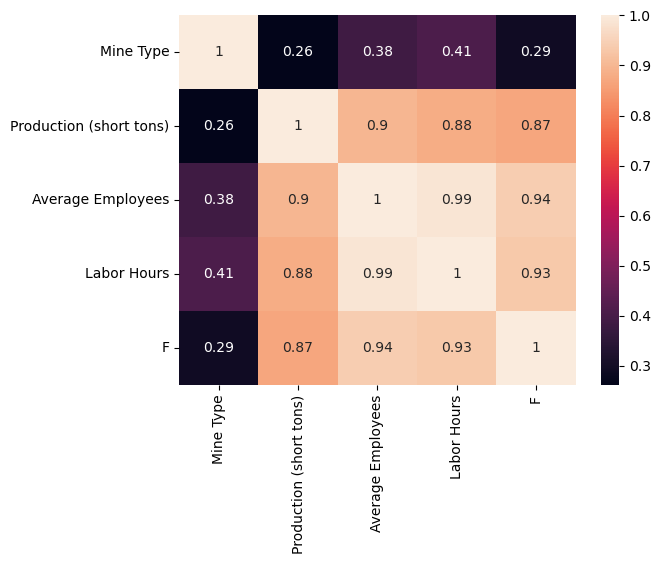

In [74]:
import seaborn as sns

g = sns.heatmap(scaled_df.drop('Year', axis = 'columns').corr(), annot=True)

fig = g.get_figure()
fig.savefig("HeatMap.png")
plt.show(g)


# PairPlot

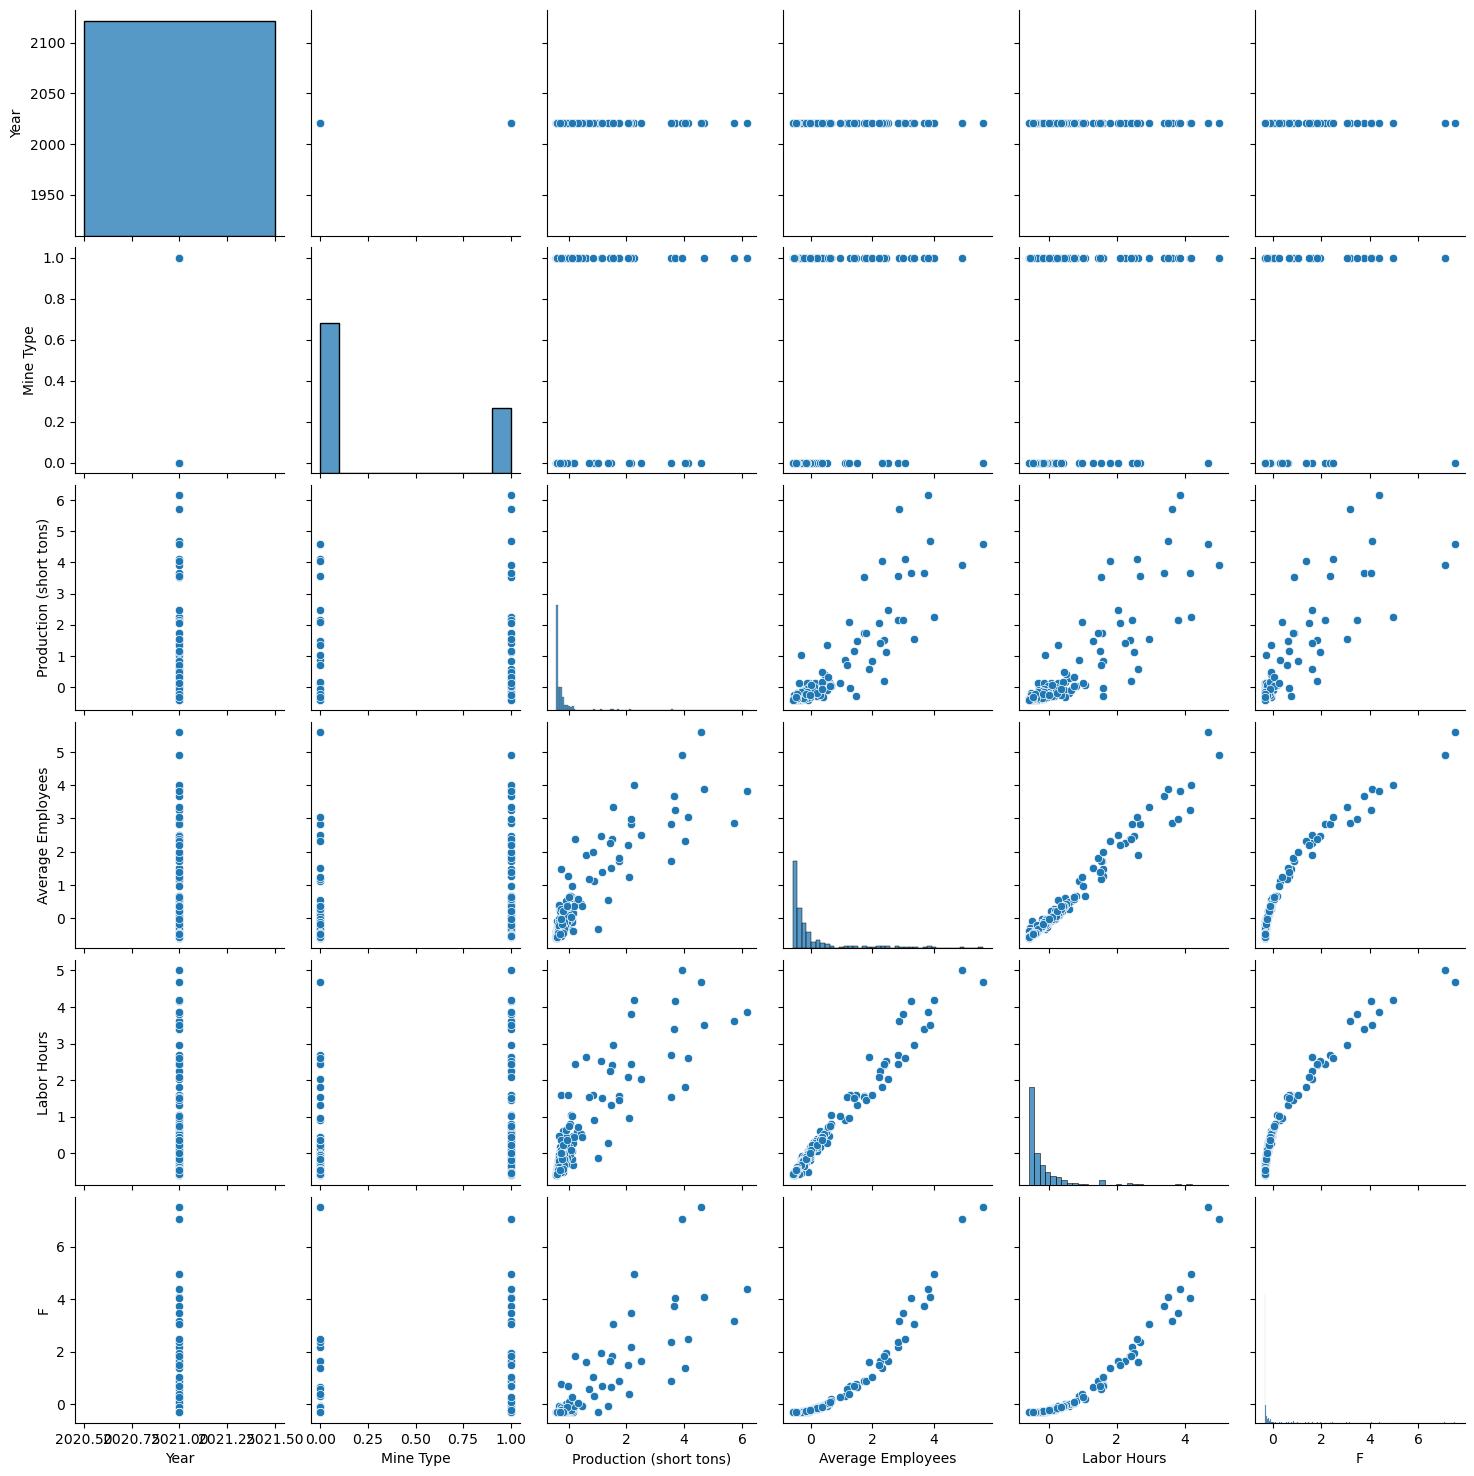

In [75]:
pp = sns.pairplot(scaled_df)
pp.figure.savefig("Pair_Plot.png")


In [76]:
input_params = ['Average Employees', 'Labor Hours', 'Mine Type', 'F']

## Splitting Data into test and train data

In [77]:
X = scaled_df[input_params]
# X = poly.fit_transform(X)
y = scaled_df['Production (short tons)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


# Using Multivariate Linear Regression Model

In [78]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [79]:
y_pred = regressor.predict(X_test)


# Matching predicted values and test values

In [80]:
y_pred

array([ 1.43193989e+00, -3.65885959e-01, -4.40107426e-01,  1.96482205e-01,
       -3.33469237e-01,  3.05918004e-01,  4.94098355e-01, -2.05831972e-01,
       -3.51988085e-01,  2.44126103e-01, -3.81513117e-01, -4.23131010e-01,
       -4.38423289e-01,  3.70554760e+00, -3.66652243e-01,  1.59748297e-01,
       -3.20151022e-01, -2.37174625e-01, -2.03449255e-01, -1.96110068e-01,
       -2.84082551e-01, -3.10981164e-01, -5.84199568e-03, -3.14228362e-01,
       -5.00936388e-01, -4.16040480e-01, -8.98950097e-02, -3.80086644e-01,
       -4.14464572e-01,  3.50517508e-01, -2.83601573e-01, -6.44740604e-01,
       -2.74464583e-01,  1.83276255e+00, -5.21473551e-01, -3.63439464e-01,
       -4.26014984e-01, -2.94811431e-01,  7.34418114e-02, -3.57178632e-01,
       -4.77524261e-01, -4.38762640e-01, -3.65057042e-01, -2.32928573e-01,
        9.38533493e-02,  1.06409222e-01, -1.99788236e-01, -3.28089806e-01,
       -4.36654389e-01, -2.91228850e-01, -4.07776633e-01,  2.02547574e+00,
       -4.27346594e-01, -

In [81]:
y_test.to_numpy()

array([ 1.72987698, -0.36948959, -0.38586743, -0.22204308, -0.36286224,
        0.02561314,  1.36478292, -0.36457152, -0.0866261 , -0.2580721 ,
       -0.39735451, -0.40816012, -0.40414572,  4.69062944, -0.30477514,
       -0.2064845 , -0.29592088, -0.1405635 , -0.31189405, -0.26648445,
       -0.35042555, -0.06027682, -0.3181515 , -0.39521946, -0.35836373,
       -0.38263382, -0.34201816, -0.40644587, -0.40067378,  0.04975413,
       -0.39822467, -0.41554467, -0.40460625,  2.05655498, -0.3185723 ,
       -0.29157381, -0.20552   ,  0.14041941, -0.16399074, -0.39446226,
       -0.35845559, -0.413998  , -0.40402159, -0.16374248, -0.09352654,
       -0.32213114,  0.07455426, -0.19220075, -0.25658625, -0.29722301,
       -0.4124054 ,  1.49691663, -0.4018133 , -0.39198585,  2.48871454,
       -0.27043803, -0.35121751, -0.40526042,  4.59192544,  0.13085015])

In [82]:
regressor.score(X_train, y_train)

0.7886653743983901

## Regressor Score of Test Data

In [83]:
regressor.score(X_test, y_test)

0.9046842260401798

## Predicting Test Data

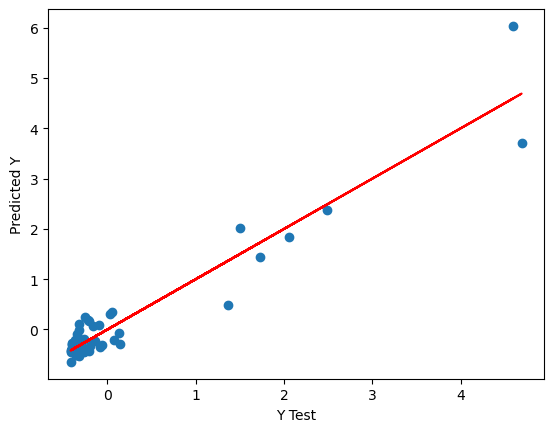

In [84]:
# Predicting Test Data

plt.scatter(y_test,y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.savefig("Predicted Y_Y Test.png")

# Predicting values based on certain input

In [85]:
regressor.predict([[5000, 20000, 0, 100000000]])

array([22351463.1511995])

# Evaluating Data

In [86]:
X_test

Average Employees  Labor Hours  Mine Type         F
33            1.802936     1.461946          1  0.859845
289          -0.483305    -0.462918          0 -0.318023
269          -0.584168    -0.572193          0 -0.321506
4             0.239551     0.354202          0 -0.131619
249          -0.449683    -0.473506          0 -0.317392
285           0.626195     0.748035          1  0.071579
161           0.542142     0.281051          0 -0.083275
101          -0.298388    -0.402389          0 -0.308053
179          -0.197524    -0.284079          1 -0.292108
277           0.289983     0.359993          0 -0.118986
214          -0.516926    -0.556656          0 -0.320925
0            -0.567358    -0.582567          0 -0.321523
153          -0.584168    -0.582406          0 -0.321548
30            3.887450     3.504562          1  4.081369
295          -0.483305    -0.458113          0 -0.317887
13            0.205930     0.391038          0 -0.132095
3            -0.147093    -0.179714          1 -0.277073
148          -0.315199    -0.296640          0 -0.301562
79           -0.281577    -0.314656          0 -0.300587
254          -0.264767    -0.259391          0 -0.295030
38           -0.382441    -0.395183          0 -0.311431
180          -0.130282    -0.133775          1 -0.270243
218          -0.029419    -0.055773          0 -0.248559
205          -0.432873    -0.498231          0 -0.317923
118          -0.382441    -0.426403          1 -0.313067
190          -0.550547    -0.532443          0 -0.320892
238          -0.130282    -0.129659          0 -0.269778
89           -0.516926    -0.565499          0 -0.321103
45           -0.550547    -0.542105          0 -0.321009
157           0.676626     0.797249          1  0.102804
177          -0.382441    -0.398304          0 -0.311595
246          -0.567358    -0.582904          1 -0.321526
145          -0.365630    -0.357215          0 -0.308510
225           2.206390     2.092714          1  1.482484
113          -0.399252    -0.393301          1 -0.312121
162          -0.483305    -0.478256          0 -0.318455
125          -0.281577    -0.308597          1 -0.300123
47           -0.382441    -0.325558          0 -0.307785
1             0.105066     0.308622          0 -0.169724
216          -0.483305    -0.517510          0 -0.319562
61           -0.348820    -0.377809          1 -0.308821
279          -0.584168    -0.580349          0 -0.321539
102          -0.500115    -0.563931          0 -0.320971
265          -0.315199    -0.324854          0 -0.303494
83            0.105066     0.149138          0 -0.196709
111           0.390846     0.473048          1 -0.069180
229           0.021013     0.091425          1 -0.220176
96           -0.449683    -0.507618          0 -0.318629
208          -0.281577    -0.237045          1 -0.294646
141          -0.382441    -0.348807          0 -0.309003
280          -0.550547    -0.583110          0 -0.321504
25            2.391307     2.401309          1  1.822601
8            -0.567358    -0.556862          0 -0.321316
69           -0.500115    -0.519958          0 -0.319909
46            2.508981     2.044480          0  1.640985
228          -0.298388    -0.247885          1 -0.296850
80           -0.382441    -0.381366          1 -0.310708
237          -0.550547    -0.576577          0 -0.321425
164           5.585320     4.688556          0  7.502175
166          -0.113472    -0.151072          0 -0.270430

In [87]:
coeffecients = pd.DataFrame(regressor.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

Coeffecient
Average Employees     0.907769
Labor Hours          -0.165801
Mine Type            -0.221665
F                     0.223502

# Checking for errors

In [88]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.2031256199052605
MSE: 0.10427847211935815
RMSE: 0.3229217739938856


In [89]:
import warnings
warnings.filterwarnings("ignore")

# Residual Plot

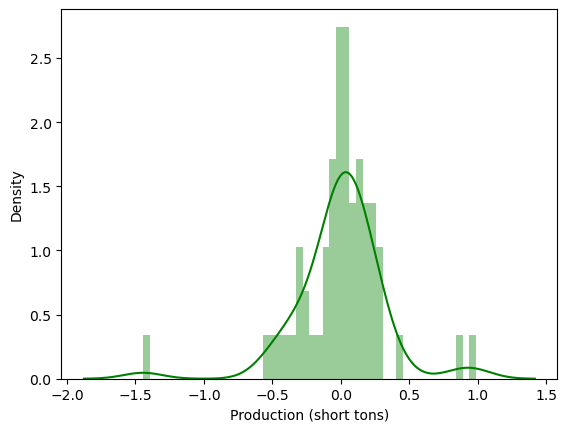

In [90]:
#Residuals

rp = sns.distplot((y_test-y_pred),bins=50, color ='green');

fig = rp.get_figure()
fig.savefig("Residual Plot.png")
plt.show(rp)